# 10mm Rods Image Processing (Method 2)

Import packages.

In [40]:
import cv2 as cv
import numpy as np
from matplotlib import pyplot as plt
import random as rng

Read image and convert to grayscale.

If you want to measure the 20 mm rods, replace the file name with "20mm Rods - Dark JPG.jpg"

In [41]:
img = cv.imread('10mm Rods - Dark JPG.jpg')
img = cv.cvtColor(img, cv.COLOR_BGR2GRAY)

Cropped the ruler out from the image because it was messing with the binarization.

In [42]:
img = img[0:1734,:]

Binarize the image with adaptive threshold.

In [43]:
th2 = cv.adaptiveThreshold(img,255,cv.ADAPTIVE_THRESH_MEAN_C,\
            cv.THRESH_BINARY,401,-4)

Erode & dilate the image.

In [44]:
kernel = cv.getStructuringElement(cv.MORPH_RECT, (3,3))
th2 = cv.erode(th2, kernel, iterations=1)
th2 = cv.dilate(th2, kernel, iterations=1)

True

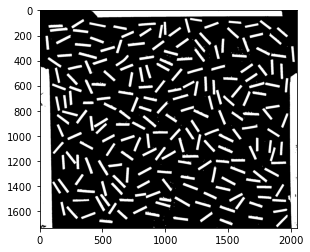

In [45]:
plt.imshow(th2,'gray')
cv.imwrite('threshImage.png', th2)

Find the contours.

In [46]:
contours, hierarchy = cv.findContours(th2, cv.RETR_TREE, cv.CHAIN_APPROX_SIMPLE)

Go through each of the contours, find the minimum area rectangle bounding each contour, and store the largest dimension of the rectangles (representing the length of the rod particle). Make sure to ignore background noise or masking tape readings.

If you want to measure the 20mm rods, change the constraints to [100,400].

In [47]:
img_color = cv.cvtColor(img, cv.COLOR_GRAY2BGR)
rng.seed(12345)

minRect = [None]*len(contours)
lengths = [None]*len(contours)
final_contours = [None]*len(contours)

PixelsInMM = 170/1852
width = 1.75/PixelsInMM


# find rod lengths of the particles
for i, c in enumerate(contours):
    if c.shape[0] > 10:
        minRectTemp = cv.minAreaRect(c)
        area = cv.contourArea(c)
        length = area/width
        if length < 200.0 and length > 50.0 and length/width > 3:
            minRect[i] = minRectTemp
            lengths[i] = length
            final_contours[i] = c
            
final_contours2 = list(filter(lambda item: item is not None, final_contours))
        
# Draw the rectangle boundaries
for i, c in enumerate(final_contours2):
    color = (rng.randint(0,256), rng.randint(0,256), rng.randint(0,256))
    cv.drawContours(img_color, final_contours2, i, color)
    #box = cv.boxPoints(minRect[i])
    #box = np.intp(box) #np.intp: Integer used for indexing (same as C ssize_t; normally either int32 or int64)
    #cv.drawContours(img_color, [box], 0, color)

cv.imshow('Contours', img_color)

True

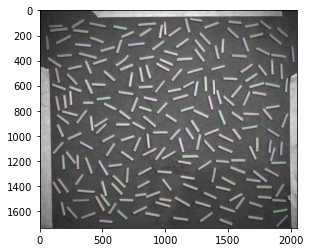

In [48]:
plt.imshow(img_color)
cv.imwrite('shapeImage.png', img_color)

Remove the "None" values in the "lengths" array. The None values are unrecorded lengths of noise and masking tape boundary rectangles.

In [49]:
raw_lengths = list(filter(lambda item: item is not None, lengths))

Convert the raw lengths from pixels to cm. I used Paint to find the conversion value from pixels to cm, and then multiplied the value by 10 to convert from cm to mm.

In [50]:
PixelsInMM = 170/1852

In [51]:
lengths_mm = np.multiply(raw_lengths,PixelsInMM)

Find the number of particles in the sample.

In [52]:
print(len(lengths_mm))

217


Find the sample mean.

In [53]:
np.mean(lengths_mm)

10.6563623746225

Find the sample standard deviation.

In [54]:
np.std(lengths_mm)

1.0368554547739528

Find the range of the distribution.

In [55]:
np.min(lengths_mm)

7.289600108757728

In [56]:
np.max(lengths_mm)

14.15068343437184

Plot a histogram of the 10mm rod lengths.

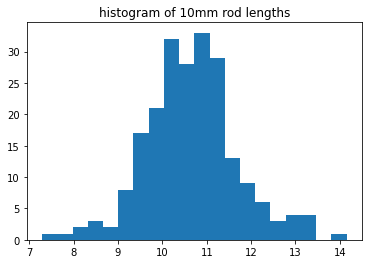

In [57]:
plt.hist(lengths_mm,bins=20) 
plt.title("histogram of 10mm rod lengths") 
plt.show()